In [1]:
import import_ipynb
import Scanpy_functions_v03262021 as sc_pipe
import scvelo as scv
scv.logging.print_version()
import warnings
import scirpy as ir
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import bbknn
import logging
from sklearn.mixture import GaussianMixture
from scipy.stats     import norm
import glob
import os
import hvplot.pandas
import docx
from docx import Document
from docx.shared import Inches
from docx.shared import Pt
from scipy import sparse
import scanpy.external as sce
import holoviews as hv
import panel as pn
import bokeh
from bokeh.resources import INLINE
import scanorama
import gseapy

importing Jupyter notebook from Scanpy_functions_v03262021.ipynb
Running scvelo 0.2.5.dev5+g1805ab4 (python 3.8.12) on 2022-07-08 09:12.
Running scvelo 0.2.5.dev5+g1805ab4 (python 3.8.12) on 2022-07-08 09:13.


In [2]:
# define sample metadata. Usually read from a file.
exclude_genes = ['Rpl', 'Rps', 'Trav', 'Traj', 'Trbj', 'Trbv','Mrp','Fau','Dap3','Uba52','Ighv', 'Igkv', 'Iglv']


In_path = '/user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/'

out_path = '/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq/human/'

In [3]:
#sc.set_figure_params(scanpy=True, dpi=200,  figsize=[12.8,9.6])
sc.settings.verbosity = 3

In [4]:
scv.settings.set_figure_params("scvelo")

In [5]:
adata = sc.read_h5ad(out_path+'/human_ingested_label.h5ad')
#mouse = sc.read_h5ad(out_path+'/mouse_labeled.h5ad')

In [6]:
adata.obs['Sample'].value_counts()

PBMC_TY38         21769
TY27_BAL          19581
BAL_TY-2          17907
Lung_HN-1         17652
PBMC_Healthy-3    16629
BAL_TY-7          16106
Lung_HN-2         15976
BAL_TY-20         15863
BAL_TY-12         15126
BAL_TY-11         14855
BAL_TY-09         13948
TY30_PBMC         13098
BAL_TY-4          12910
BAL_TY-17         11637
BAL_TY-8          11585
BAL_TY-19         10386
BAL_TY-6          10246
BAL_TY-5           9934
BAL_TY-3           9251
BAL_TY-16          8921
BAL_TY-1           8129
TY28_BAL           8089
BAL_TY-15          7278
Lung_HN10          5216
BAL_TY-13          4508
TY26_BAL           4016
Name: Sample, dtype: int64

In [7]:
#sc.tl.leiden(adata, resolution=3,key_added='leiden_resol_3')

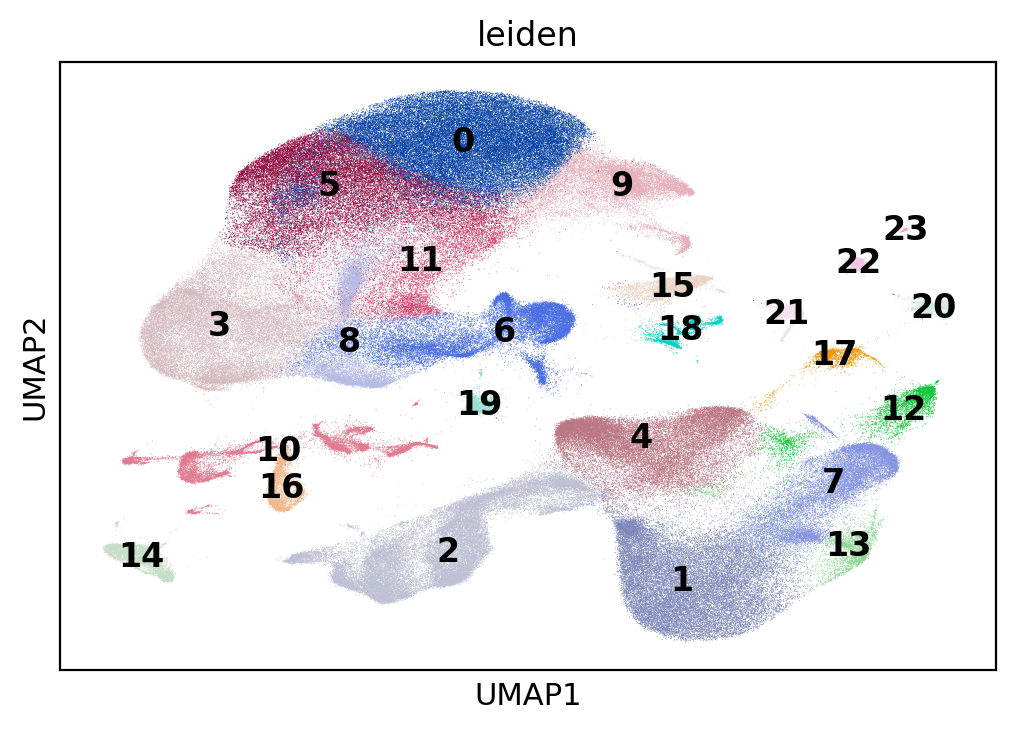

In [8]:
sc.pl.umap(adata,color='leiden',legend_loc = 'on data')

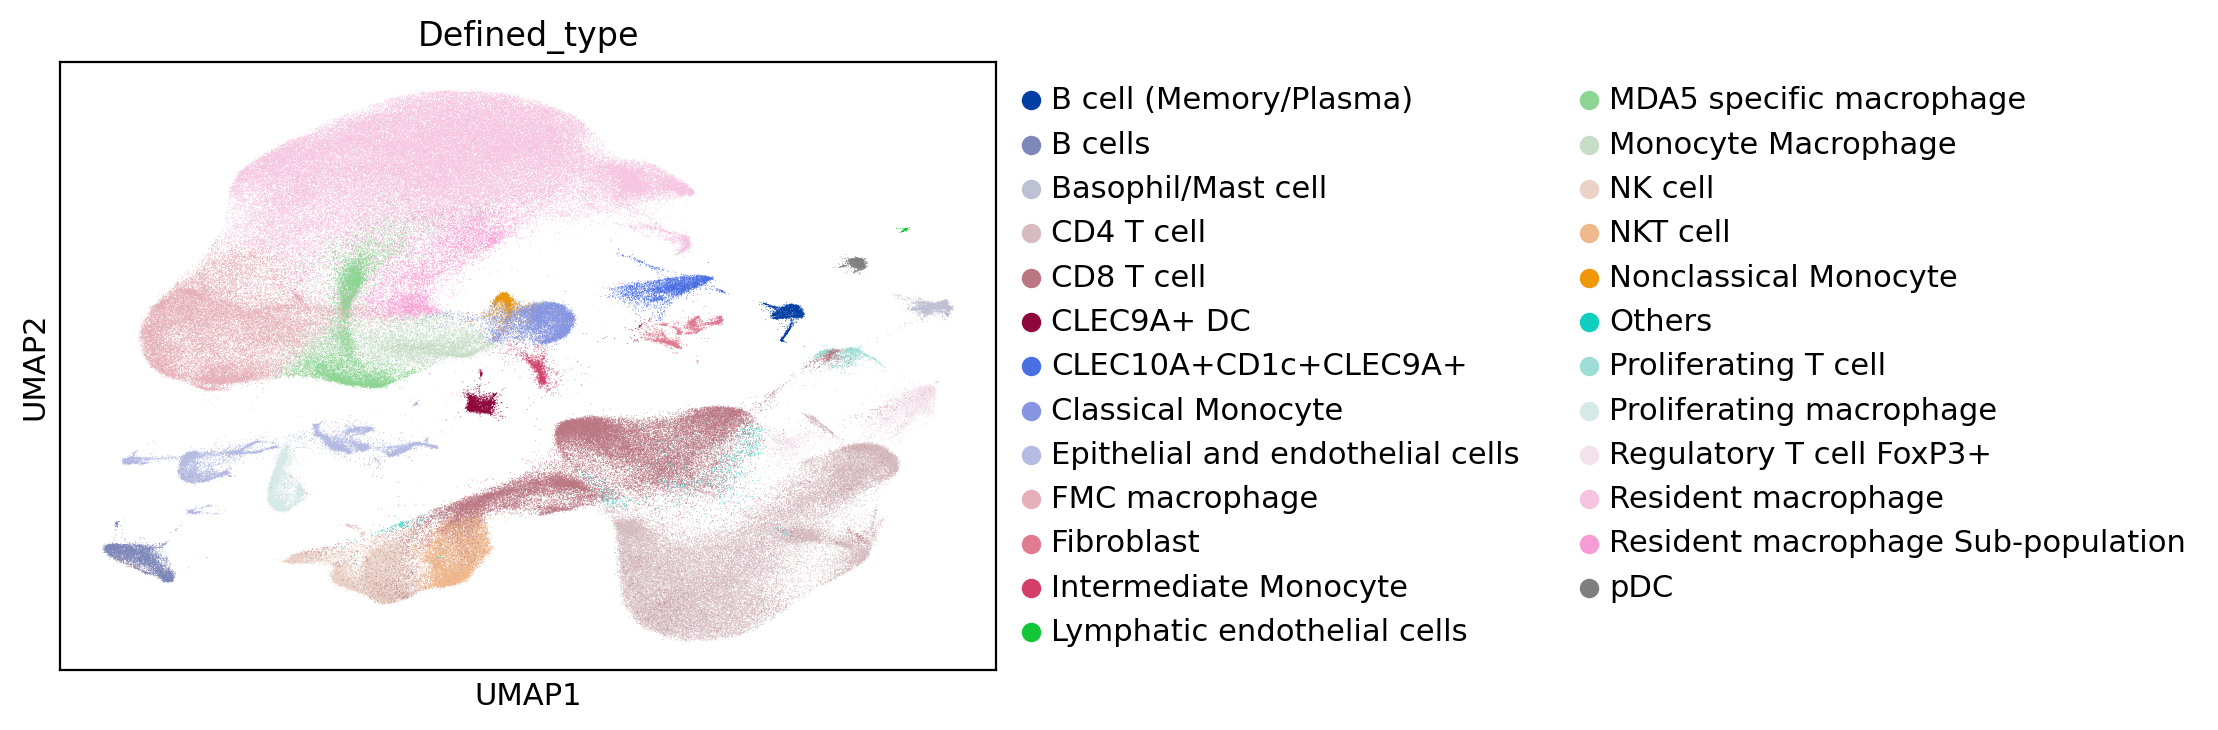

In [9]:
sc.pl.umap(adata,color='Defined_type')

In [10]:
adata.obs['Sample'].unique().tolist()

['BAL_TY-09',
 'BAL_TY-11',
 'BAL_TY-12',
 'BAL_TY-13',
 'BAL_TY-15',
 'BAL_TY-1',
 'BAL_TY-16',
 'BAL_TY-17',
 'BAL_TY-19',
 'BAL_TY-20',
 'BAL_TY-2',
 'BAL_TY-3',
 'BAL_TY-4',
 'BAL_TY-5',
 'BAL_TY-6',
 'BAL_TY-7',
 'BAL_TY-8',
 'Lung_HN10',
 'Lung_HN-1',
 'Lung_HN-2',
 'PBMC_Healthy-3',
 'PBMC_TY38',
 'TY26_BAL',
 'TY27_BAL',
 'TY28_BAL',
 'TY30_PBMC']

In [11]:
adata

AnnData object with n_obs × n_vars = 320616 × 29104
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Sample', 'batch', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score', 'predicted_doublet', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log_counts', 'leiden', 'Cell_Type', 'leiden_resol_3', 'Defined_type', 'Monocyte_factors', 'CD14_binary', 'FCGR3A_binary', 'CCR2_binary', 'CX3CR1_binary', 'Tcell_factors', 'CD8A_binary', 'CD3E_binary', 'Mouse_refered'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    

In [12]:
BALS = ['BAL_TY-09',
 'BAL_TY-11',
 'BAL_TY-12',
 'BAL_TY-13',
 'BAL_TY-15',
 'BAL_TY-1',
 'BAL_TY-16',
 'BAL_TY-17',
 'BAL_TY-19',
 'BAL_TY-20',
 'BAL_TY-2',
 'BAL_TY-3',
 'BAL_TY-4',
 'BAL_TY-5',
 'BAL_TY-6',
 'BAL_TY-7',
 'BAL_TY-8',

 'TY26_BAL',
 'TY27_BAL',
 'TY28_BAL']



In [13]:
adata=adata[adata.obs['Sample'].isin(BALS)]

In [14]:
adata

View of AnnData object with n_obs × n_vars = 230276 × 29104
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Sample', 'batch', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score', 'predicted_doublet', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log_counts', 'leiden', 'Cell_Type', 'leiden_resol_3', 'Defined_type', 'Monocyte_factors', 'CD14_binary', 'FCGR3A_binary', 'CCR2_binary', 'CX3CR1_binary', 'Tcell_factors', 'CD8A_binary', 'CD3E_binary', 'Mouse_refered'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 's

In [15]:
del adata.uns
adata.uns[ 'log1p']= {}

Filtered out 16428 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:57)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:03:07)
computing moments based on connectivities
    finished (0:04:50) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:44:27)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:37)
--> added 'pos', the PAGA positions (adata.uns['paga'])


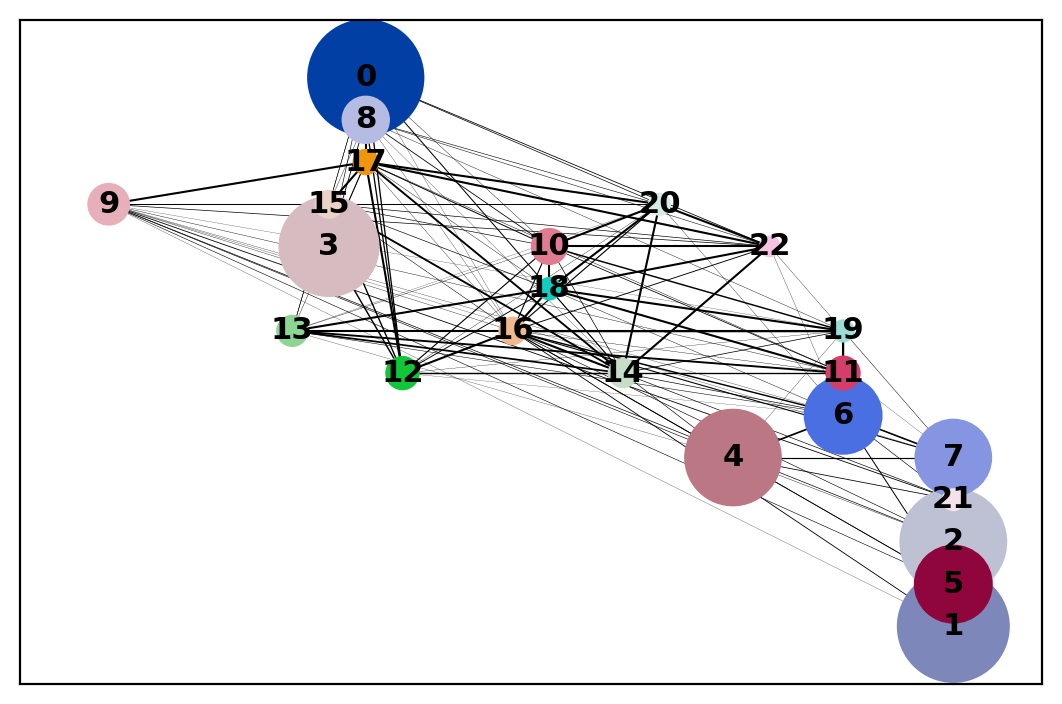

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:05:15)


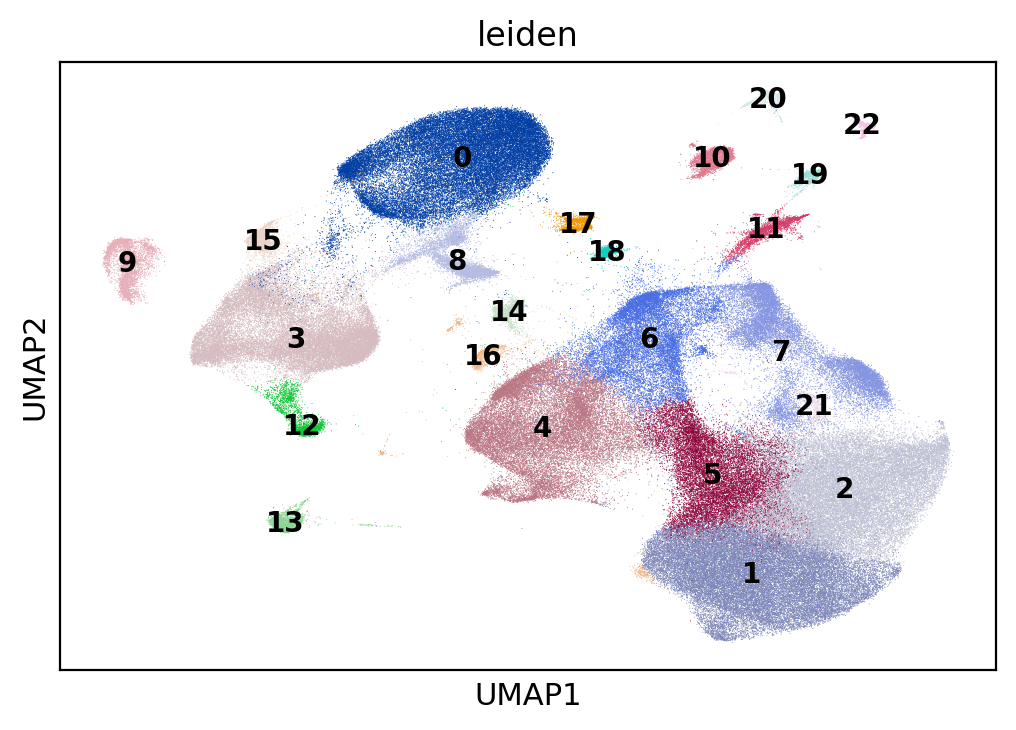

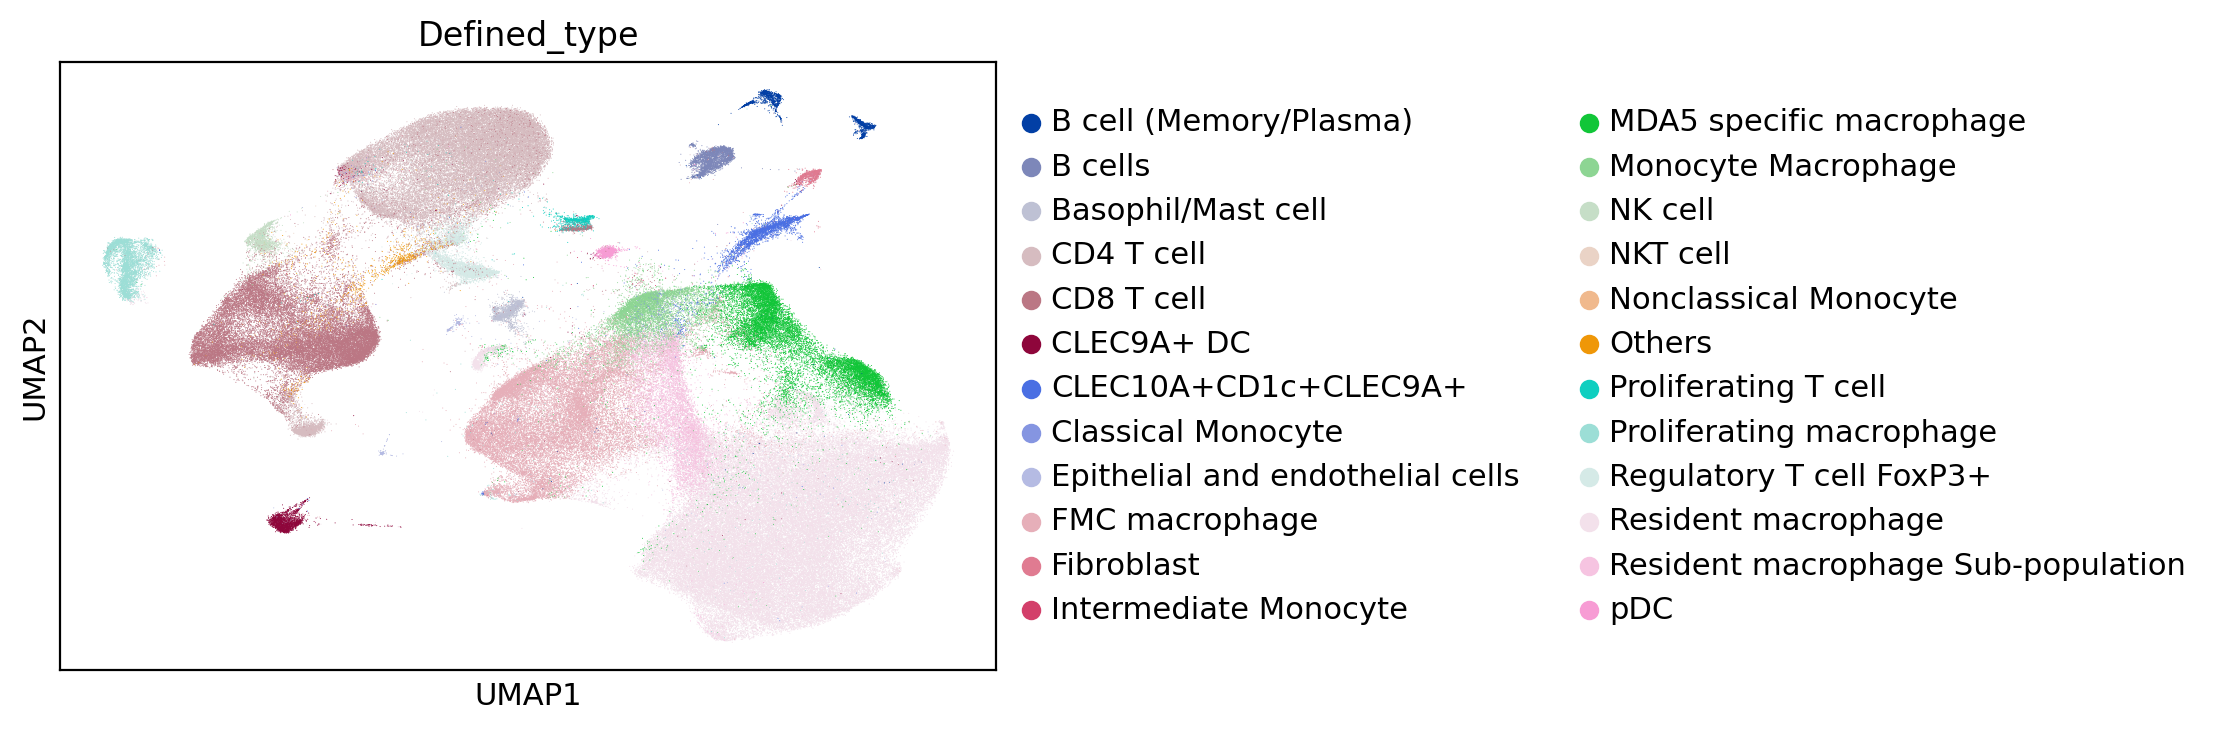

In [16]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20)
sc.tl.pca(adata)
# Reclustering
bbknn.bbknn(adata,batch_key='Sample')
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)
sc.tl.leiden(adata)
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata,node_size_power= 1.0,threshold=0.1 ,layout ='rt',edge_width_scale = 0.1) 
sc.tl.umap(adata,  init_pos=sc.tl._utils.get_init_pos_from_paga(adata), maxiter=100, min_dist=0.1, spread= 4.0)
sc.pl.umap(adata, color='leiden', legend_loc='on data',legend_fontsize=10) 
sc.pl.umap(adata, color = 'Defined_type')

In [17]:
del adata.obs['predicted_doublet']
adata.write(out_path+'/human_0707_BALs.h5ad')

In [18]:

from pyBCS import scanpy2bcs
scanpy2bcs.format_data(out_path+'/human_0707_BALs.h5ad', out_path+'/human_BAL_0707.bcs',
                        input_format="h5ad", graph_based="leiden")


Writing main/metadata/metalist.json
Cannot convert Sample to numeric, treating as categorical
Cannot convert leiden to numeric, treating as categorical
Cannot convert Cell_Type to numeric, treating as categorical
Cannot convert Defined_type to numeric, treating as categorical
Cannot convert Monocyte_factors to numeric, treating as categorical
Cannot convert CD14_binary to numeric, treating as categorical
Cannot convert FCGR3A_binary to numeric, treating as categorical
Cannot convert CCR2_binary to numeric, treating as categorical
Cannot convert CX3CR1_binary to numeric, treating as categorical
Cannot convert Tcell_factors to numeric, treating as categorical
Cannot convert CD8A_binary to numeric, treating as categorical
Cannot convert CD3E_binary to numeric, treating as categorical
Cannot convert Mouse_refered to numeric, treating as categorical
Found graph based clustering in metadata with keyword leiden
Writing main/metadata/7c45025c2e78492bae15ea4256e06671.json
Writing main/metadata/

'/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq/human//human_BAL_0707.bcs'

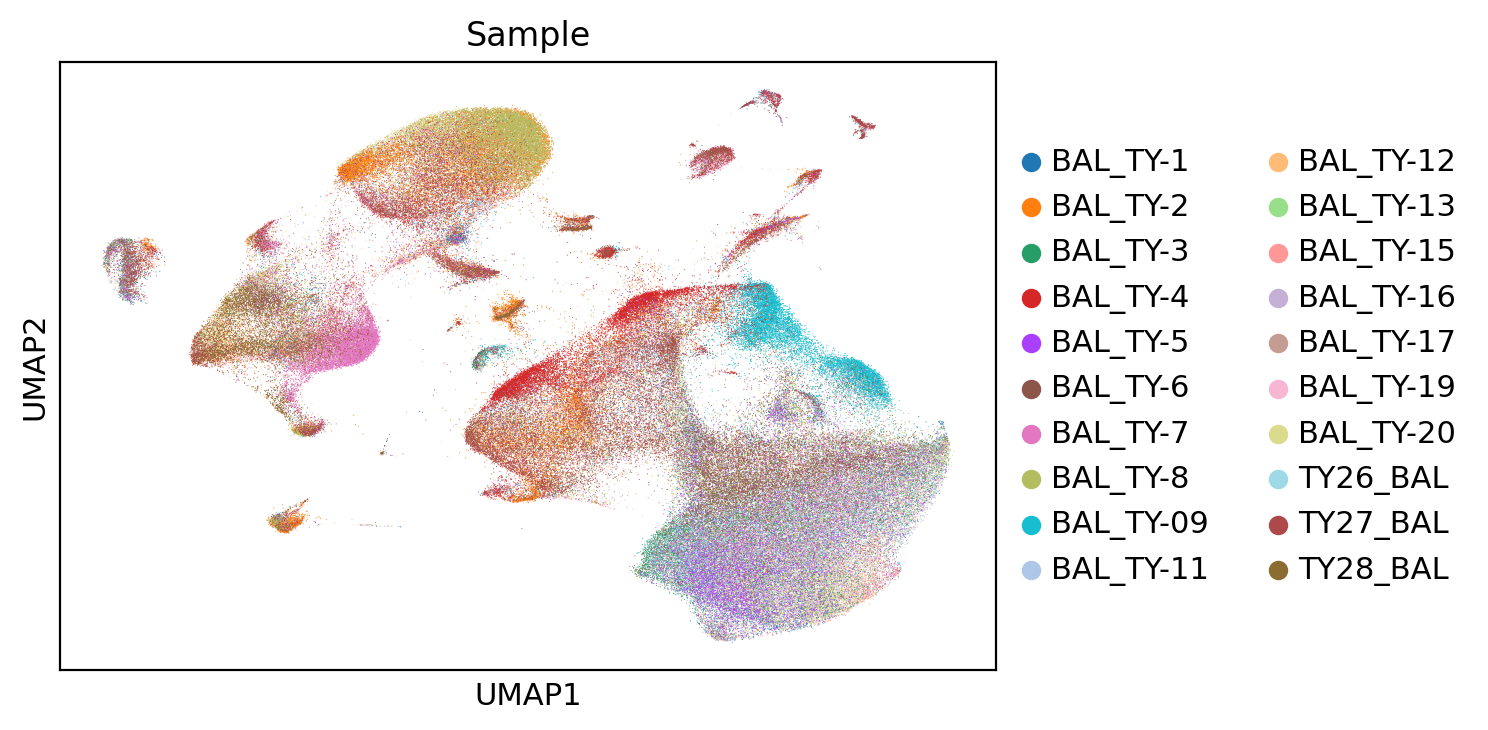

In [19]:
sc.pl.umap(adata, color = 'Sample')